# File information
File: Assignment_10.ipynb

Name: Amie Davis

Date: 2/9/2021

Course: DSC650 - Big Data

Assignment Number: 10,1, 10.2, 10.3

Purpose:
- Transform text input into tokens and convert those tokens into numeric vectors using one-hot encoding and feature hashing.
- Build basic text-processing models using recurrent neural networks (RNN)
- Understand how word embeddings such as Word2Vec can help improve the performance of text-processing models

# References:

Bengfort, B., Bilbro, R., & Ojeda, T. (2018). Applied Text Analysis with Python: Enabling Language Aware Data Products with Machine Learning. Sebastopol, CA: OReilly Media, Incorporated.

Chollet, F. (2018). Deep learning with Python. Shelter Island, NY: Manning Publications.

https://keras.io/api/datasets/imdb/

# Assignment 10.1
Implement basic text-preprocessing functions in Python. These functions do not need to scale to large text documents and will only need to handle small inputs. 

## Assignment 10.1a
Create a tokenize function that splits a sentence into words. Ensure that your tokenizer removes basic punctuation. 

In [1]:
import sys, unicodedata
def tokenize(sentence):
    
    # Create a dictionary of punctuation characters
    punctuation = dict.fromkeys(i for i in range(sys.maxunicode)
                                if unicodedata.category(chr(i)).startswith('P'))
    
    # Remove punctuation characters
    sentence = sentence.translate(punctuation)
    
    # Change to lowercase
    sentence = sentence.lower()

    tokens = []
    # tokenize the sentence
    for word in sentence.split():
        tokens.append(word)
        
    return tokens

#Test function
tokenize('Create a tokenize function that splits a sentence into words. Ensure that your tokenizer removes basic punctuation.')

['create',
 'a',
 'tokenize',
 'function',
 'that',
 'splits',
 'a',
 'sentence',
 'into',
 'words',
 'ensure',
 'that',
 'your',
 'tokenizer',
 'removes',
 'basic',
 'punctuation']

## Assignment 10.1b
Implement an `ngram` function that splits tokens into N-grams.  

In [2]:
def ngram(tokens, n):
    
    ngrams = []
    # Create ngrams
    for idx in range(len(tokens)-n+1):
        ngrams.append(tokens[idx:idx+n])
    
    return ngrams

# Test function
ngram(['create','a','tokenize','function','that','splits','a','sentence','into','words'], 5)

[['create', 'a', 'tokenize', 'function', 'that'],
 ['a', 'tokenize', 'function', 'that', 'splits'],
 ['tokenize', 'function', 'that', 'splits', 'a'],
 ['function', 'that', 'splits', 'a', 'sentence'],
 ['that', 'splits', 'a', 'sentence', 'into'],
 ['splits', 'a', 'sentence', 'into', 'words']]

## Assignment 10.1c
Implement a one_hot_encode function to create a vector from a numerical vector from a list of tokens. 

In [3]:
import numpy as np
def one_hot_encode(tokens, num_words):
    
    token_index = {}
    results = ''
    
    for token in tokens:
        
        # Assign unique index to each unique token
        if token not in token_index:
            token_index[token] = len(token_index) + 1

    # Initialize vector of zeros
    results = np.zeros(shape=(
                        len(tokens),
#                        num_words,
                        max(token_index.values()) + 1))    # Vectorized tokens

    for i, token in enumerate(tokens):
        index = token_index.get(token)
        results[i, index] = 1.
#        print(i,token)
        
    return results

# Test function
one_hot_encode(['create','a','tokenize','function','that','splits','a','sentence','into','words'], 3)

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

# Assignment 10.2
Using listings 6.16, 6.17, and 6.18 in Deep Learning with Python as a guide, train a sequential model with embeddings on the IMDB data found in data/external/imdb/. Produce the model performance metrics and training and validation accuracy curves within the Jupyter notebook.

In [4]:
# Process the labels of the raw IMDB data
# The Keras imdb dataset is represented by integers
# Need to download dataset to set strings
import os

imdb_dir = 'aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

# Negative reviews are stored in the neg subdirectory
# Positive reviews are stored in the pos subdirectory
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding="utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [5]:
# Tokenize the text of the raw IMDB data 
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100    # Cuts off reviews after 100 words
max_words = 10000    # Considers only the top 10,000 words in the dataset

# Split 10,000 training reviews into training and validation samples (70/30)
training_samples = int(10000 * 0.7)
validation_samples = int(10000 * 0.3)

# Creates vocabulary index based on word frequency
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Transforms to a sequence of integers
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# Pad data since all sequences in a batch must have the same length
data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Shuffle data before splitting dataset
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

# Split into train/validation datasets
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Using TensorFlow backend.
C:\Users\amomu\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\amomu\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\amomu\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\amomu\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [6]:
# Train model without pretrained word embeddings
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

embedding_dim = 100

# Instantiate model
model = Sequential()

# Add embedding layer to vectorize words
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))

# Flattens 3D embedded tensor into 2D tensor
model.add(Flatten())

# Binary Classifier Model
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Review layers
model.summary()

# Compile and fit model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 7000 samples, validate on 3000 samples
Epoch 1/10
7000/7000 [==============================] - 4s 564us/step - loss: 0.5555 - acc: 0.7049 

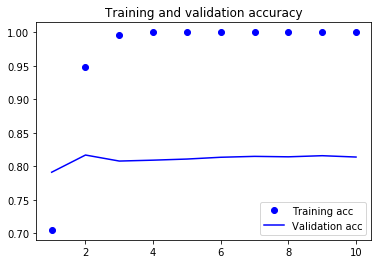

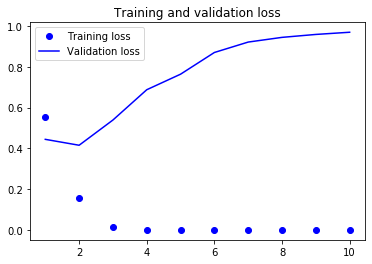

In [7]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

A lot of loss on the valdation training set. Accuracy peaks with 4 epochs.

In [8]:
# Re-run w/ 4 epochs
history = model.fit(x_train, y_train,
                    epochs=4,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Train on 7000 samples, validate on 3000 samples
Epoch 1/4
7000/7000 [==============================] - 4s 540us/step - loss: 5.1521e-09 - acc: 1.0000 - val_loss: 0.9779 - val_acc: 0.8133
Epoch 2/4
7000/7000 [==============================] - 4s 545us/step - loss: 4.7075e-09 - acc: 1.0000 - val_loss: 0.9860 - val_acc: 0.8137
Epoch 3/4
7000/7000 [==============================] - 4s 542us/step - loss: 4.4786e-09 - acc: 1.0000 - val_loss: 0.9934 - val_acc: 0.8113
Epoch 4/4
7000/7000 [==============================] - 4s 556us/step - loss: 4.3210e-09 - acc: 1.0000 - val_loss: 0.9983 - val_acc: 0.8113


In [9]:
# Prepare test data
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname),encoding="utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [10]:
# Evaluate the model on the test set
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 1s 57us/step


[1.0145229630964994, 0.8131999969482422]

81% accuracy, not bad.  When originally trainined on the full 25,000 dataset, model was more overfit and only 50% accuracte on validation and test sets.

# Assignment 10.3
Using listing 6.27 in Deep Learning with Python as a guide, fit the same data with an LSTM layer. Produce the model performance metrics and training and validation accuracy curves within the Jupyter notebook.

In [11]:
# Fit the same data with an LSTM layer
from keras.layers import LSTM

# Instantiate model
model = Sequential()

# Add embedding layer to vectorize words
model.add(Embedding(max_words, 32))

# Add LSTM RNN layer
model.add(LSTM(32))

# Binary Classifier Model
model.add(Dense(1, activation='sigmoid'))

# Compile and fit model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

# Splits previous training set into 80/20 for validation
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 5600 samples, validate on 1400 samples
Epoch 1/10
5600/5600 [==============================] - 5s 931us/step - loss: 0.6474 - acc: 0.6361 - val_loss: 0.5278 - val_acc: 0.7700
Epoch 2/10
5600/5600 [==============================] - 5s 847us/step - loss: 0.4441 - acc: 0.8100 - val_loss: 0.4380 - val_acc: 0.8329
Epoch 3/10
5600/5600 [==============================] - 5s 854us/step - loss: 0.3120 - acc: 0.8823 - val_loss: 0.4010 - val_acc: 0.8371
Epoch 4/10
5600/5600 [==============================] - 5s 851us/step - loss: 0.2339 - acc: 0.9230 - val_loss: 0.3898 - val_acc: 0.8357
Epoch 5/10
5600/5600 [==============================] - 5s 817us/step - loss: 0.1767 - acc: 0.9450 - val_loss: 0.3974 - val_acc: 0.8286
Epoch 6/10
5600/5600 [==============================] - 5s 862us/step - loss: 0.1366 - acc: 0.9602 - val_loss: 0.5131 - val_acc: 0.8157
Epoch 7/10
5600/5600 [==============================] - 5s 857us/step - loss: 0.1013 - acc: 0.9746 - val_loss: 0.5710 - val_acc: 0.8179


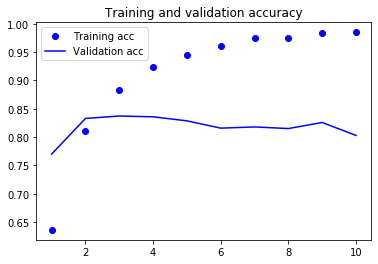

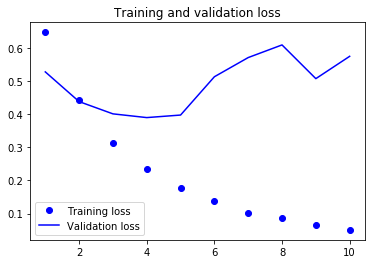

In [12]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Overfit again!

In [13]:
# Evaluate the model on the test set
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 13s 522us/step


[0.5954227439522743, 0.7846400141716003]

With the LSTM layer, the accuracy is still around 80%, at 78%.

# Assignment 10.4
Using listing 6.46 in Deep Learning with Python as a guide, fit the same data with a simple 1D convnet. Produce the model performance metrics and training and validation accuracy curves within the Jupyter notebook.

In [15]:
# Fit the same data with a simple 1D convnet on the IMDB data
from keras import layers
from keras.optimizers import RMSprop

# Instantiate model
model = Sequential()

# Add embedding layer to vectorize words
model.add(layers.Embedding(max_words, 128, input_length=maxlen))

# Add 1D Conv RNN layer
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())

# Binary Classifier Model
model.add(layers.Dense(1))

# Review layers
model.summary()

# Compile and fit model
model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

# Splits previous training set into 80/20 for validation
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 128)          1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 94, 32)            28704     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 18, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 12, 32)            7200      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
___________________________________________

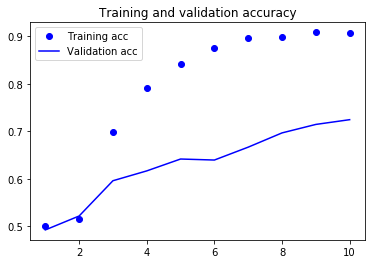

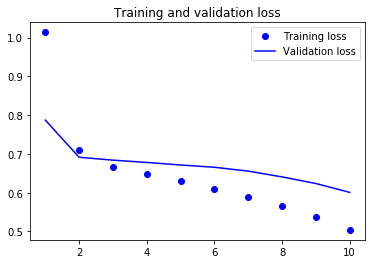

In [16]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [17]:
# Evaluate the model on the test set
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 3s 119us/step


[0.6050236287117005, 0.7178000211715698]

With the 1D convnet, accuracy is a little lower at 71%, but processing time was much faster.